# Question 1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv('DJIA.csv', index_col=0)

Text(0.5,1,'Dow Jones over time')

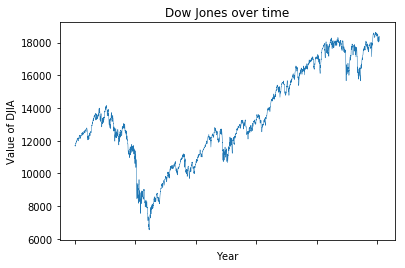

In [9]:
#drop nan
df = df.dropna(axis=0)
# Drop any values with dots
df = df.drop(df[df['VALUE']=='.'].index)
# cast to float
df = pd.to_numeric(df['VALUE'])

df.plot(y='VALUE',lw=.5)
plt.ylabel("Value of DJIA")
plt.xlabel('Year')
plt.title('Dow Jones over time')

In [10]:
paychecks = pd.read_csv('paychecks.csv', header=None)

Text(0,0.5,'Wage')

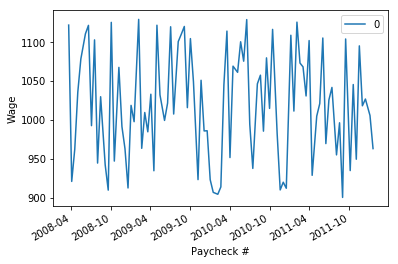

In [11]:
idx1 = pd.date_range(start='13/03/2008', periods=93, freq="WOM-1FRI" )
idx2 = pd.date_range(start='13/03/2008', periods=93, freq="WOM-3FRI" )

date_idx = pd.DatetimeIndex.union(idx1,idx2)[0:93]

paychecks = paychecks.set_index(date_idx)

paychecks.plot()
plt.xlabel('Paycheck #')
plt.ylabel('Wage')

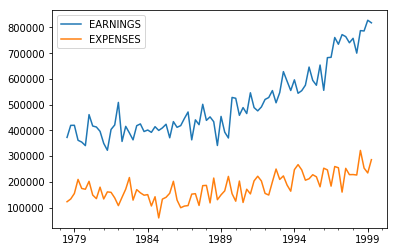

In [12]:
finances = pd.read_csv('finances.csv')

periodidx = pd.period_range(start="1978-09", periods=len(finances.index), freq="Q-DEC")
finances = finances.set_index(periodidx)

finances.plot()

# Question 4

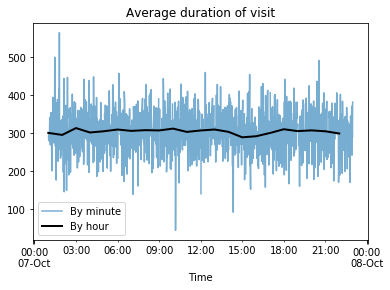

In [13]:
websites = pd.read_csv('website_traffic.csv', parse_dates=['ENTER', 'LEAVE'], index_col=1)

websites['DURATION'] = (websites.LEAVE - websites.index).dt.seconds
fig, ax = plt.subplots()

websites.resample('1min').mean().plot(legend=False, ax=ax, alpha=0.6)
websites.resample('H').mean().plot(legend=False, ax=ax, lw=2, c='k')
plt.legend(['By minute', 'By hour'])
plt.title('Average duration of visit')
plt.xlabel('Time')
plt.show()

# Question 5

In [25]:
djia = pd.read_csv('DJIA.csv', index_col=0)

#drop nan
djia = djia.dropna(axis=0)
# Drop any values with dots
djia = djia.drop(djia[djia['VALUE']=='.'].index)

In [26]:
day_diff = (pd.to_numeric(djia['VALUE']) - pd.to_numeric(djia.shift(1)['VALUE'])).dropna()

print('Biggest gain')
print(day_diff.sort_values()[-1:])

print('\nBiggest Loss')
print(day_diff.sort_values()[0:1])

Biggest gain
DATE
2008-10-13    936.42
Name: VALUE, dtype: float64

Biggest Loss
DATE
2008-09-29   -777.68
Name: VALUE, dtype: float64


In [27]:
djia = djia.set_index(pd.to_datetime(djia.index))

djia_month = djia.resample('M').first()

m_diff = (pd.to_numeric(djia_month['VALUE']) - pd.to_numeric(djia_month.shift(1)['VALUE'])).dropna()

print('Month Biggest Gain')
print(m_diff.sort_values()[-1:])
print('\nMonth Biggest Loss')
print(m_diff.sort_values()[0:1])

Month Biggest Gain
DATE
2015-11-30    1556.75
Name: VALUE, dtype: float64

Month Biggest Loss
DATE
2015-09-30   -1539.85
Name: VALUE, dtype: float64


# Question 6

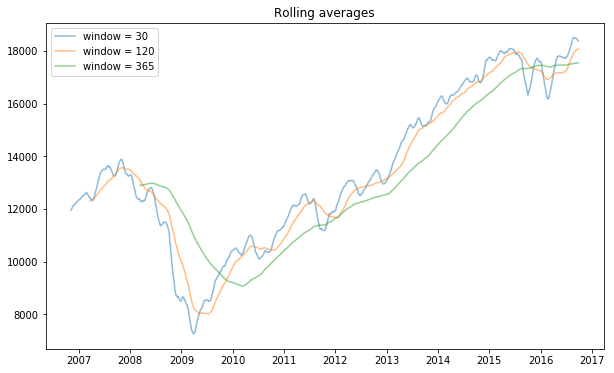

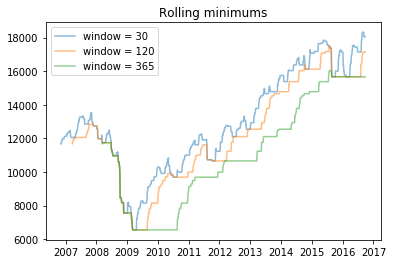

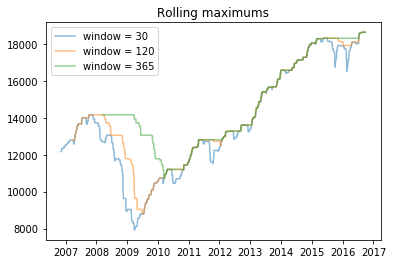

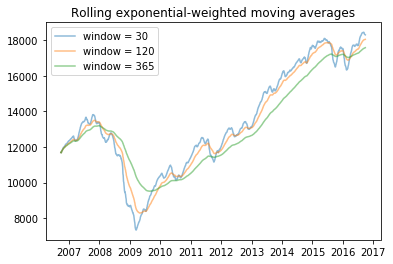

In [35]:
windows  =  [30, 120,365]

plt.figure(figsize=(10, 6))

for w in windows:
    plt.plot(djia.rolling(window=w).mean(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling averages')
plt.legend()
plt.show()

for w in windows:
    plt.plot(djia.rolling(window=w).min(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling minimums')
plt.legend()
plt.show()

for w in windows:
    plt.plot(djia.rolling(window=w).max(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling maximums')
plt.legend()
plt.show()

for w in windows:
    plt.plot(djia.ewm(span=w).mean(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling exponential-weighted moving averages')
plt.legend()
plt.show()